# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [2]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [3]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Let's conduct an analysis of the height data - self-reported heights in inches

In [4]:
data('heights')

This gives us a data frame.

In [6]:
#overview of dataframe
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

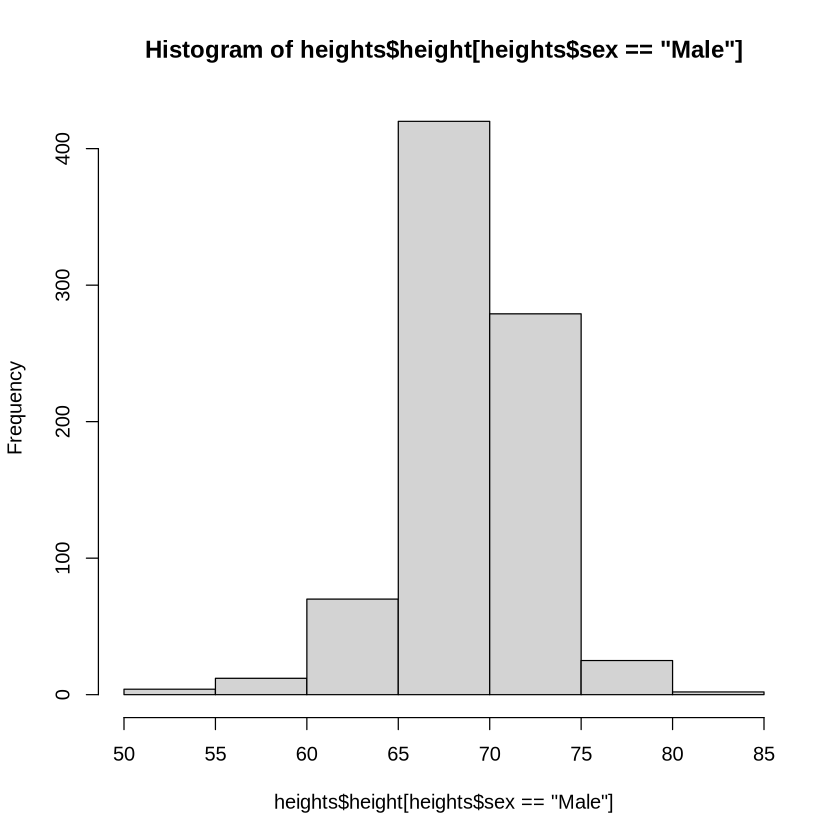

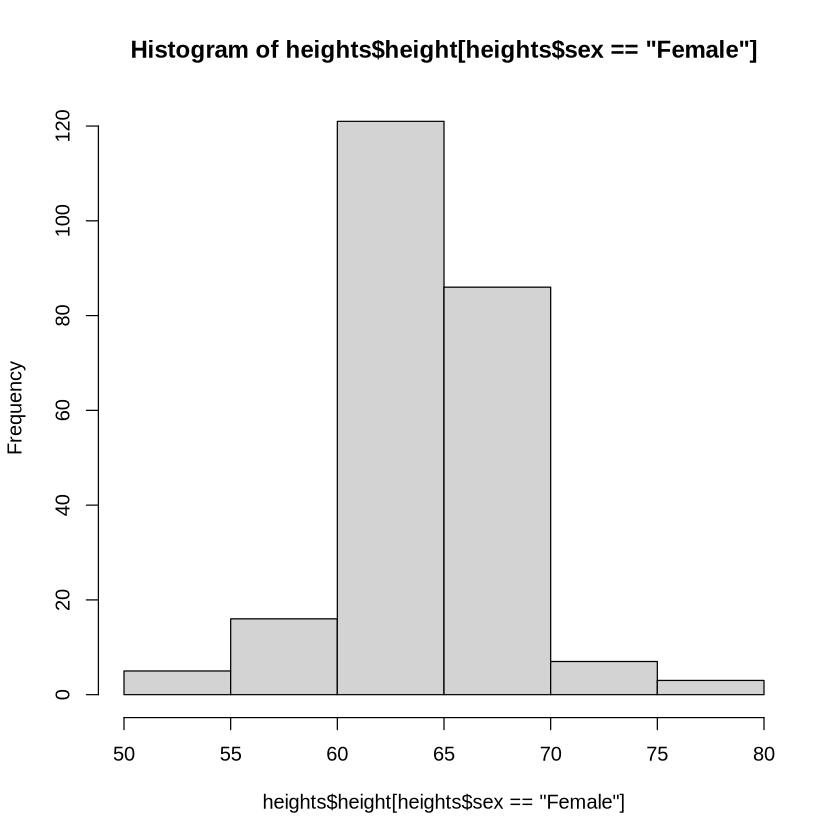

In [8]:
hist(heights$height[heights$sex=="Male"])
hist(heights$height[heights$sex=="Female"])

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


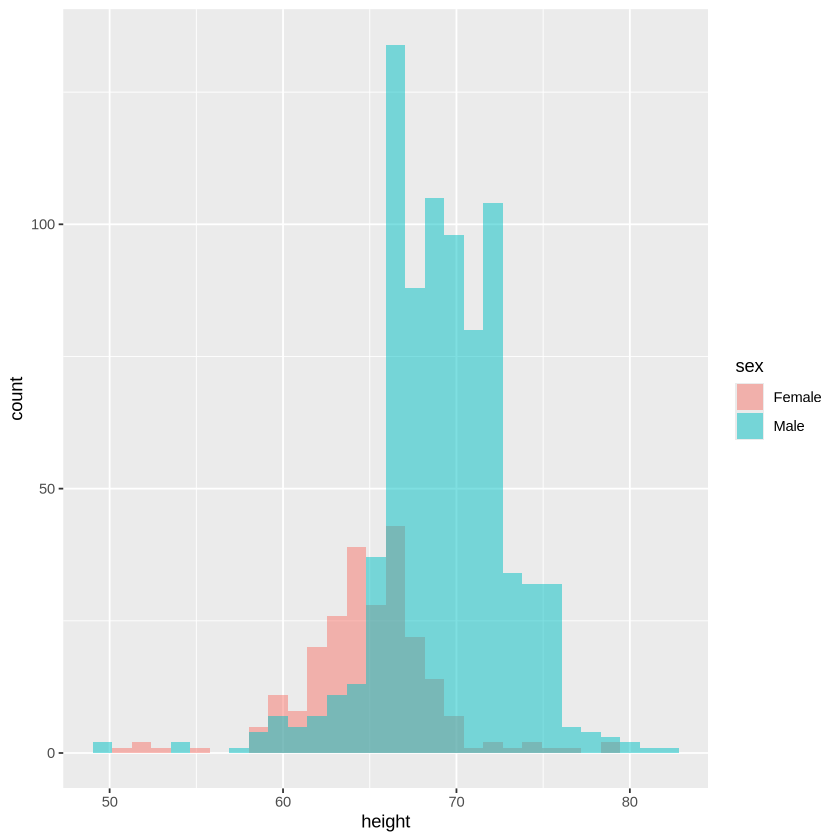

In [11]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
    geom_histogram(position='identity',
                  alpha=0.5)

#alpha determines transparency

In [14]:
#finding the mean, median and standard deviation
stats_table <- heights %>%
    group_by(sex) %>%
    summarise(mean_height = mean(height),
              median_height = median(height),
              sd_height = sd(height))

In [15]:
stats_table

sex,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


Let's look at the summary statistics - you can actually make them in 1 table!

In [17]:
#is the distribution normal or not - w value as close to 1 as possible, p value as small as possible
shapiro.test(heights$height[heights$sex=="Male"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


In [18]:
shapiro.test(heights$height[heights$sex=="Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


Lets try visualising the data in terms of probability distributions

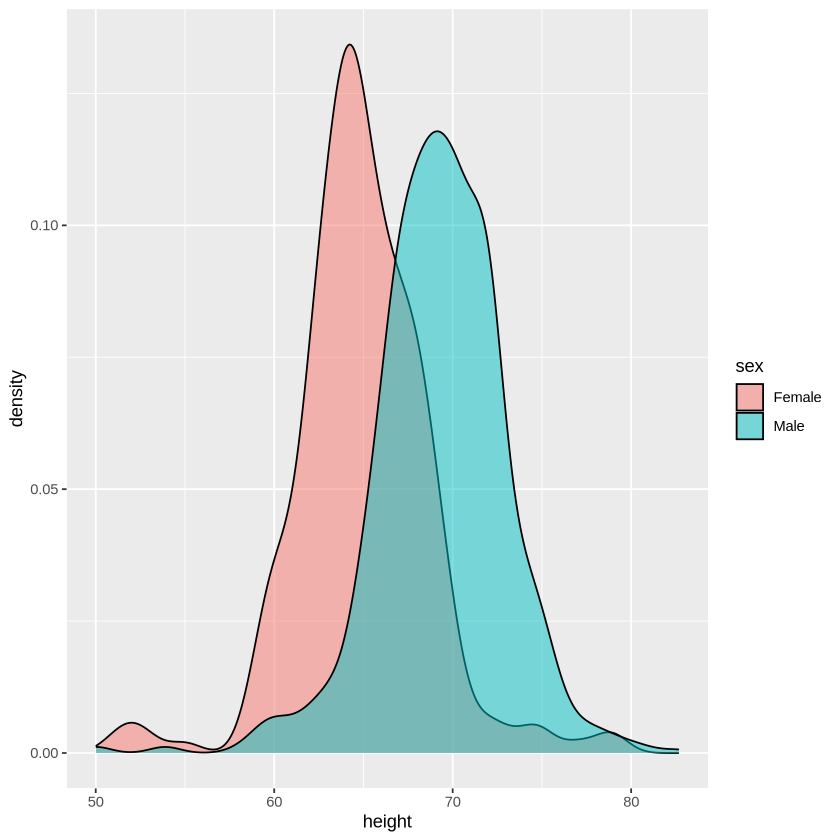

In [19]:
ggplot(heights, 
       aes(x = height,
           fill = sex)) +
    geom_density(alpha=0.5)
#fill is for color, alpha is for transparency

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [20]:
#not confirming that there is a difference, but rejecting the null hypothesis - that there is no difference
t.test(height ~ sex, data=heights)
#this is instead of using the tables joshua talked about
#e-16 means move the decimal 16 places to the left
#df  degrees of freedom - the bigger the better


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [21]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [22]:
library(fueleconomy)

In [23]:
data(vehicles)

In [25]:
#structure function
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [26]:
Audi_Midsize <- vehicles %>%
    filter(make == "Audi") %>%
    filter(class == "Midsize Cars")

In [36]:
VW_Midsize <- vehicles %>%
    filter(make == "Volkswagen") %>%
    filter(class == "Midsize Cars")

How many cars do we have in each group?

In [37]:
#number of rows
nrow(Audi_Midsize)

#structure
str(VW_Midsize)

[1] 157

tibble [97 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:97] 6871 6872 8005 8006 9077 ...
 $ make : chr [1:97] "Volkswagen" "Volkswagen" "Volkswagen" "Volkswagen" ...
 $ model: chr [1:97] "Passat" "Passat" "Passat" "Passat" ...
 $ year : num [1:97] 1990 1990 1991 1991 1992 ...
 $ class: chr [1:97] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:97] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Manual 5-spd" ...
 $ drive: chr [1:97] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:97] 4 4 4 4 4 4 4 4 6 6 ...
 $ displ: num [1:97] 2 2 2 2 2 2 2 2 2.8 2.8 ...
 $ fuel : chr [1:97] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:97] 26 27 26 27 26 28 26 28 22 25 ...
 $ cty  : num [1:97] 18 18 18 18 18 18 18 18 15 17 ...


Let's use t.test to compare performance of the two cars

In [38]:
t.test(Audi_Midsize$cty, VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


Let's visualise the data and see if this is the best way to ask our question

In [39]:
Audi_VW <- rbind(Audi_Midsize, VW_Midsize)

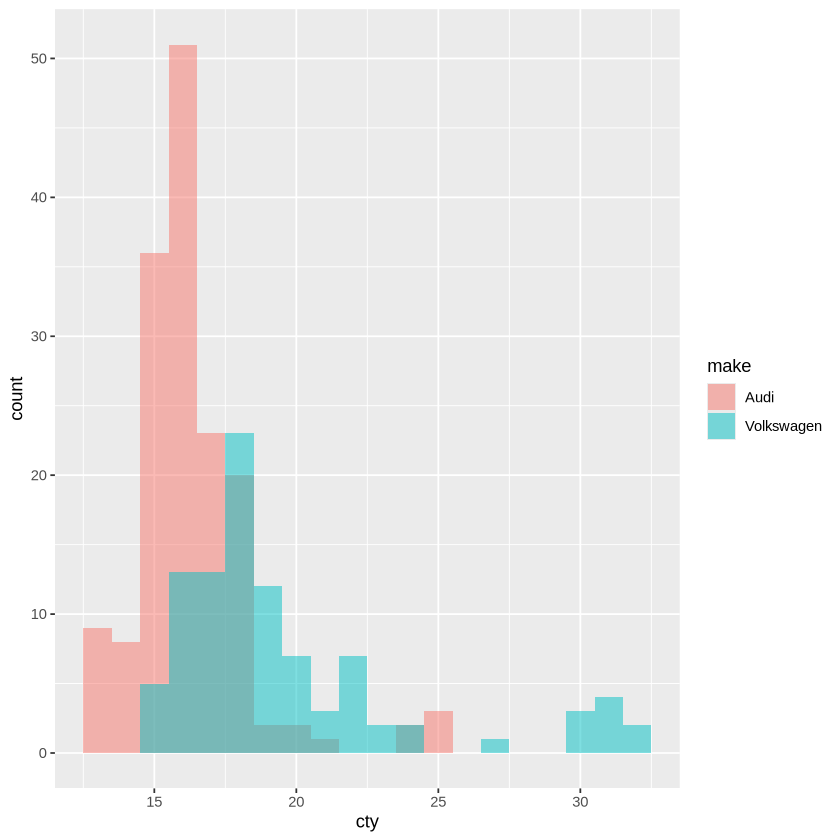

In [41]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_histogram(position = 'identity',
                   alpha=0.5, 
                  bins = 20)

In [42]:
shapiro.test(Audi_Midsize$cty)
shapiro.test(VW_Midsize$cty)


	Shapiro-Wilk normality test

data:  Audi_Midsize$cty
W = 0.80939, p-value = 4.961e-13



	Shapiro-Wilk normality test

data:  VW_Midsize$cty
W = 0.77643, p-value = 7.732e-11


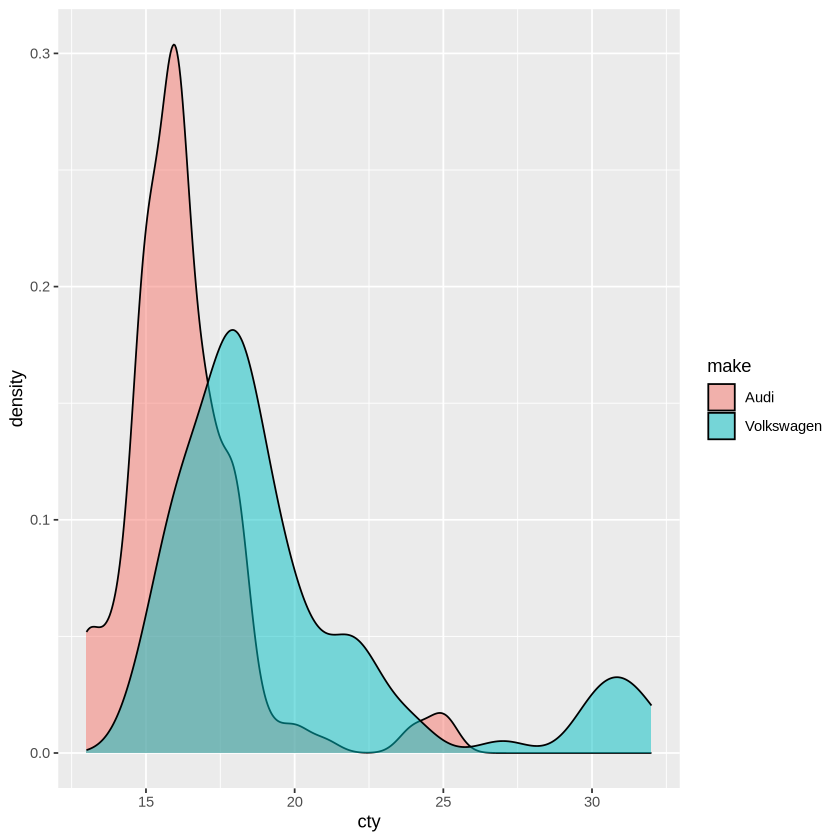

In [44]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_density(alpha = 0.5)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [45]:
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

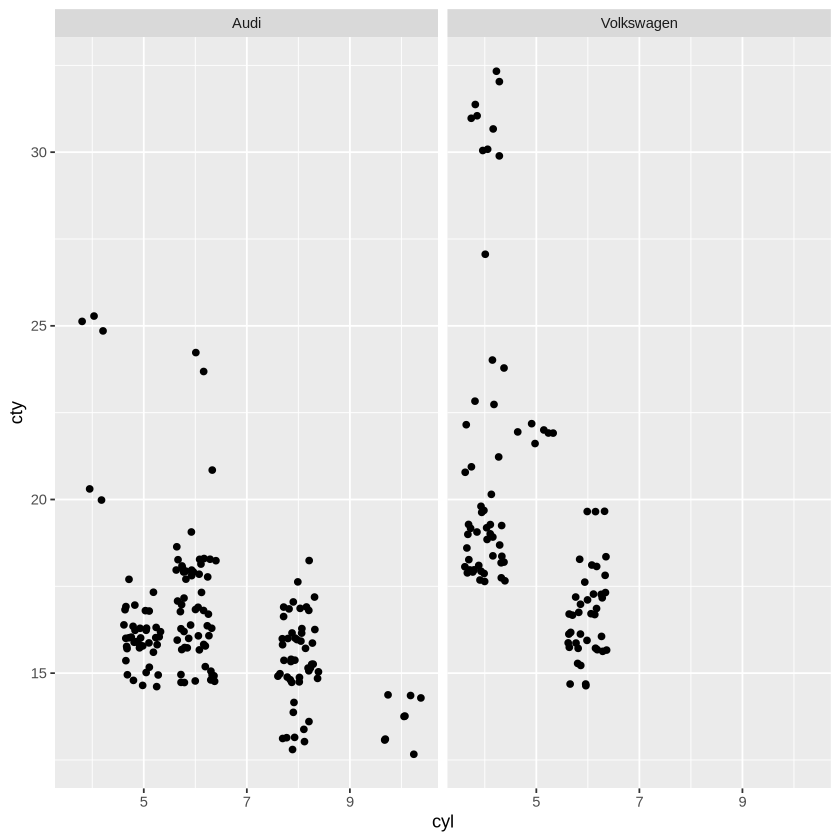

In [49]:
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point(position = 'jitter') + 
    facet_wrap(~make)
# facet wrap makes different sections of plots, jitter makes it so you can see plots that are otherwise in the same place

In [50]:
data(iris)

In [ ]:
#1. Look up the documentation - what is each variable?
#2. Look at the dataframe
#3. Plot all sepal  width for all three species in 1 plot - as fancy as possible
#4. compare setosa and versicolor varieties in terms of sepal length
    - summary stats
    - making frequency plots
    - making probability plot
    - normality test
    - t-test + interpret

In [52]:
#2
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [53]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


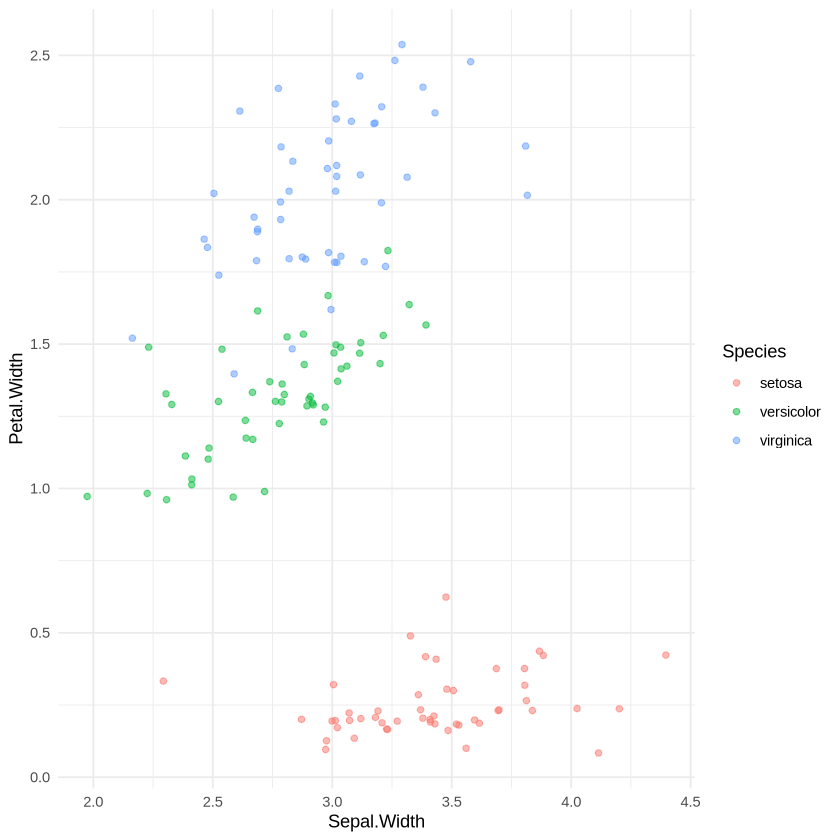

In [74]:
# 3
ggplot(iris,
       aes(x = Sepal.Width,
           y = Petal.Width, 
           color = Species)) +
    geom_point(position = 'jitter',
              alpha= 0.5)+
theme_minimal()

In [73]:
# 4
#first try - wrong
Setosa_variety <- iris %>%
    filter(Species == "Setosa") %>%
    filter(Sepal.Length == >0)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:28: unexpected '>'
2:     filter(Species == "Setosa") %>%
3:     filter(Sepal.Length == >
                              ^


In [75]:
# 
setosa <- iris %>%
    filter(Species == 'setosa')
versicolor <- iris %>%
    filter(Species == 'versicolor')
sepal_comparison <- rbind(setosa, versicolor)

In [77]:

setosa <- iris %>%
    filter(Species == 'setosa')
versicolor <- iris %>%
    filter(Species == 'versicolor')


iris2 <- iris %>%
    filter(Species == 'Setosa' | Species == 'Versicolor')


iris3 <- iris %>%
    filter(Species != 'virginica')

In [80]:
#summary stats
stats_table <- iris3 %>%
    group_by(Species) %>%
    summarise(mean_height = mean(Sepal.Length),
              median_height = median(Sepal.Length),
              sd_height = sd(Sepal.Length))
stats_table

Species,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
setosa,5.006,5.0,0.3524897
versicolor,5.936,5.9,0.5161711


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


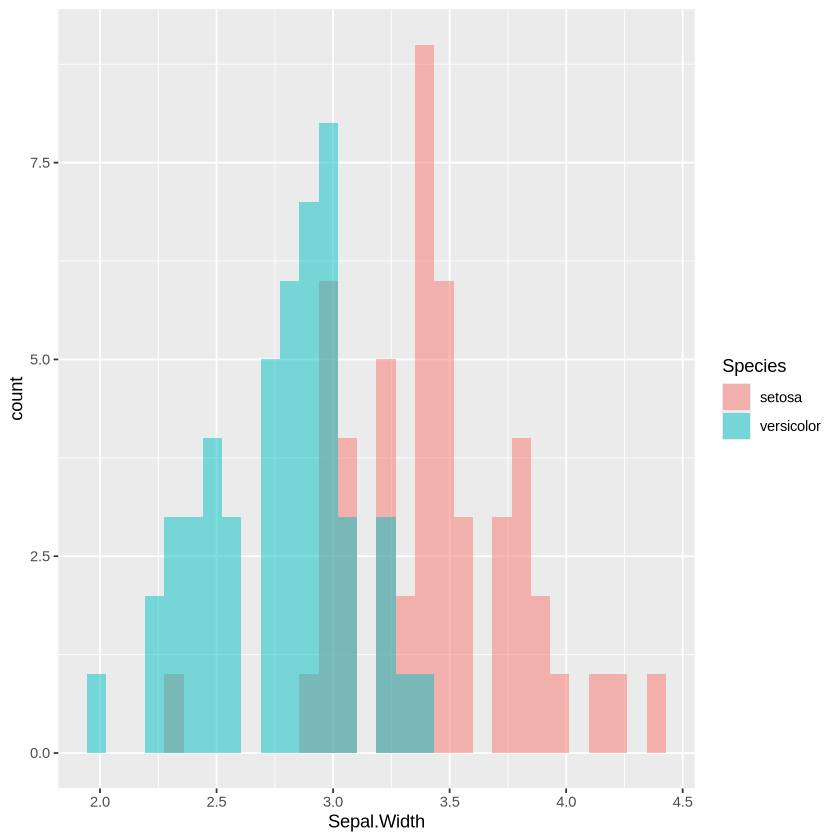

In [81]:
ggplot(iris3,
       aes(x=Sepal.Width,
           fill=Species)) +
    geom_histogram(position='identity',
                  alpha=0.5)

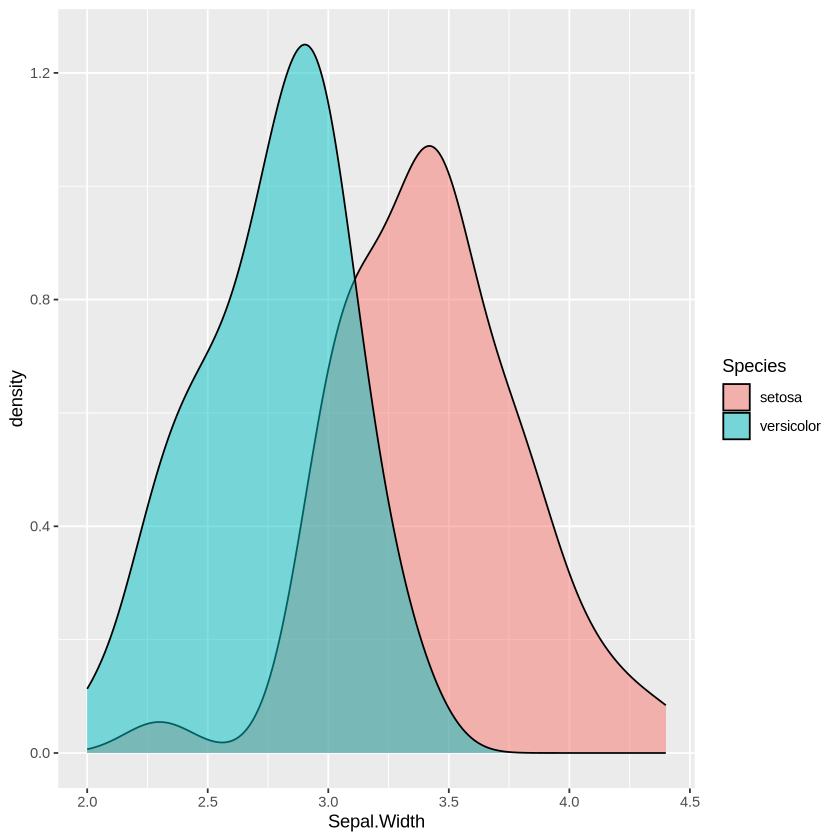

In [82]:
ggplot(iris3,
       aes(x=Sepal.Width,
           fill=Species)) +
    geom_density(alpha=0.5)

In [84]:
shapiro.test(iris3$Sepal.Length[iris$Species == 'setosa'])
shapiro.test(iris3$Sepal.Length[iris$Species == 'versicolor'])


	Shapiro-Wilk normality test

data:  iris3$Sepal.Length[iris$Species == "setosa"]
W = 0.9777, p-value = 0.4595



	Shapiro-Wilk normality test

data:  iris3$Sepal.Length[iris$Species == "versicolor"]
W = 0.97784, p-value = 0.4647


In [85]:
t.test(Sepal.Length ~ Species, data = iris3)


	Welch Two Sample t-test

data:  Sepal.Length by Species
t = -10.521, df = 86.538, p-value < 2.2e-16
alternative hypothesis: true difference in means between group setosa and group versicolor is not equal to 0
95 percent confidence interval:
 -1.1057074 -0.7542926
sample estimates:
    mean in group setosa mean in group versicolor 
                   5.006                    5.936 
